In [2]:
import numpy as np

### task #1

In [76]:
import scipy.linalg
a1 = np.random.randn(4, 4)
mu, sigma = 1, 2
a2 = mu + sigma * np.random.randn(4, 4)
matrix = scipy.linalg.block_diag(a1, a2)
print("матрица:\n", matrix)
print("собственные значения:\n", np.linalg.eigvals(matrix))

матрица:
 [[-0.92083995 -0.59395459  0.44899673  0.78637002  0.          0.
   0.          0.        ]
 [-0.21897053 -0.30168911 -0.9362338  -1.10085404  0.          0.
   0.          0.        ]
 [-0.46111554  0.65842797 -0.34443331  0.07145421  0.          0.
   0.          0.        ]
 [-1.40618058 -1.53581642 -0.6102132   0.33424794  0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          1.76167545  2.74210371
   0.14874865  2.03360956]
 [ 0.          0.          0.          0.          3.00310998 -0.2461259
   1.25989846  1.06758743]
 [ 0.          0.          0.          0.         -1.08059118  3.92867089
   1.33195143  4.67944497]
 [ 0.          0.          0.          0.          1.1352681   1.21129824
   4.74865167  0.16434102]]
собственные значения:
 [ 0.87840862+0.j         -0.93948418+0.j         -0.58581944+0.85891527j
 -0.58581944-0.85891527j  7.07814226+0.j          2.48335007+0.j
 -4.84685884+0.j         -1.70279149+0.j        ]


### task #2

In [17]:
def number_of_bits(num):
    answer = 0
    while (num):
        answer += num & 1
        num = num >> 1
    return answer

#### 1 вариант - вычисление в цикле for

In [18]:
%%time
arr = np.arange(1, 2e5, dtype=int)
answer = [number_of_bits(val) for val in arr]
print(answer[0:100])

[1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 2, 3, 3, 4, 3]
CPU times: user 2.25 s, sys: 0 ns, total: 2.25 s
Wall time: 2.25 s


#### 2 вариант - векторизация при помощи numpy.vectorize

In [20]:
%%time
arr = np.arange(1, 2e5, dtype=int)
print(np.vectorize(number_of_bits)(arr)[:100])

[1 1 2 1 2 2 3 1 2 2 3 2 3 3 4 1 2 2 3 2 3 3 4 2 3 3 4 3 4 4 5 1 2 2 3 2 3
 3 4 2 3 3 4 3 4 4 5 2 3 3 4 3 4 4 5 3 4 4 5 4 5 5 6 1 2 2 3 2 3 3 4 2 3 3
 4 3 4 4 5 2 3 3 4 3 4 4 5 3 4 4 5 4 5 5 6 2 3 3 4 3]
CPU times: user 639 ms, sys: 0 ns, total: 639 ms
Wall time: 639 ms


#### 3 вариант - вычисление в цикле с использованием numba

In [21]:
import numba

@numba.njit
def number_of_bits(num):
    answer = 0
    while (num):
        answer += num & 1
        num = num >> 1
    return answer

In [22]:
%%time
arr = np.arange(1, 2e5, dtype=int)
mask = [number_of_bits(val) for val in arr]
print(mask[0:100])

[1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 2, 3, 3, 4, 3]
CPU times: user 397 ms, sys: 4.48 ms, total: 402 ms
Wall time: 456 ms


#### 4 вариант - вычисление с использованием numba и vectorize

In [23]:
%%time
arr = np.arange(1, 2e5, dtype=int)
print(np.vectorize(number_of_bits)(arr)[:100])

[1 1 2 1 2 2 3 1 2 2 3 2 3 3 4 1 2 2 3 2 3 3 4 2 3 3 4 3 4 4 5 1 2 2 3 2 3
 3 4 2 3 3 4 3 4 4 5 2 3 3 4 3 4 4 5 3 4 4 5 4 5 5 6 1 2 2 3 2 3 3 4 2 3 3
 4 3 4 4 5 2 3 3 4 3 4 4 5 3 4 4 5 4 5 5 6 2 3 3 4 3]
CPU times: user 88.4 ms, sys: 3.18 ms, total: 91.5 ms
Wall time: 91.5 ms


### task #3

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

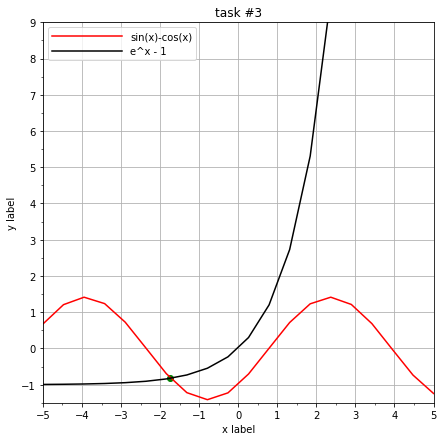

In [55]:
x = np.linspace(-5, 5, 20)
fig, ax = plt.subplots(figsize=(7,7))  # Создать фигуру и оси координат

ax.plot(x, np.sin(x)-np.cos(x), label='sin(x)-cos(x)', color='red')  
ax.plot(x, np.exp(x) - 1, label='e^x - 1', color='black')
ax.scatter(-1.7346096, np.exp(-1.7346096) - 1, color='green')

plt.grid()
plt.axis([-5, 5, -1.5, 9])  # задаём границы по x и y

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))

ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

ax.set_xlabel('x label')  # Подписываем ось х
ax.set_ylabel('y label')  # Подписываем ось у
ax.set_title("task #3")  # Добавляем заголовок
ax.legend()  # Рисуем легенду
plot.legend(loc=2, prop={'size': 10})

### task #4

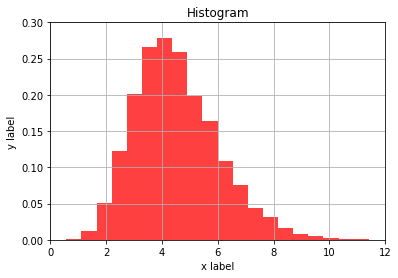

In [107]:
import random

arr = [random.gammavariate(alpha = 9, beta = 0.5) for i in range(10000)]

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Histogram')
plt.grid(True) 
n, bins, patches = plt.hist(arr, 20, density=True, color='red', alpha=0.75)
plt.axis([0, 12, 0, 0.3]) 
plt.show()